In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
LABELS = ["Legal", "Fraud"]

In [ ]:
data=pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Text(0, 0.5, 'Frequency')

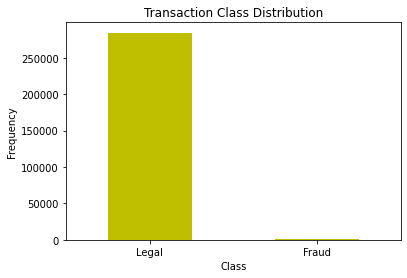

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar',color='y', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This data is highly unbalanced.
0->normal transaction
1->fraud transaction

Seperating data for analysis

In [ ]:
legal=data[data.Class==0]
fraud=data[data.Class==1]

In [ ]:
print(legal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Here we can see easily that our fraud  data is very small compared to legitimate data

In [ ]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We will compare values for both transaction

In [ ]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now we will do under-sampling.
We will build a sample dataset containing similar distribution of normal transaction and fraud transaction.

In [ ]:
legal_sample=legal.sample(n=492)

We Shuffle the entire dataset using sample function and separate classes by filtering the dataframe.

Concatenating two dataframes

In [ ]:
new_data=pd.concat([legal_sample,fraud],axis=0)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174999,122161.0,-0.330795,0.994296,1.943926,3.555033,0.439756,0.450415,0.097002,0.228069,-1.221898,0.949123,-1.521173,-0.715264,-0.149665,-0.193309,-0.348725,0.622136,-0.498567,0.285803,-0.800460,-0.043223,0.337847,1.025536,-0.111824,-0.019406,-0.691264,0.173892,0.220594,0.213902,0.00,0
87086,61531.0,-1.298090,-0.262751,2.704656,1.683154,0.183907,0.376020,-0.743498,0.459639,0.756772,-0.351358,-1.829265,0.213444,0.085061,-0.949527,-0.784853,-0.854889,0.440851,0.351352,1.410860,0.499145,0.107804,0.593987,-0.283129,-0.081099,0.665378,0.107515,0.363783,0.165060,28.90,0
184763,126378.0,0.112625,1.046821,-0.106466,-0.415234,0.706215,-1.099116,1.145432,-0.347792,-0.200512,-0.325051,-0.734956,0.605654,1.245039,0.179658,0.371993,-0.540599,-0.513035,-0.058995,-0.015337,0.047144,0.383486,1.454418,-0.156483,-0.009432,-0.755441,-0.216817,0.522484,0.323400,0.74,0
146259,87570.0,-0.353436,1.269883,-0.961278,-0.345418,0.699455,-1.255432,1.179938,0.092026,-0.759450,-0.399453,0.612024,1.035275,-0.018459,1.054369,-1.244177,-0.843700,-0.123412,0.122240,0.691967,-0.090775,0.355120,1.179158,-0.172494,0.137291,-0.350184,-0.176893,0.327169,0.212094,14.96,0
40399,40221.0,-0.771810,-3.558222,0.052716,0.978733,-1.739529,1.242905,0.327482,0.268497,0.837084,-0.738386,1.260080,1.167143,-0.523989,0.022753,-0.361078,-0.324749,0.496301,-0.785138,-0.340241,1.776040,0.447790,-0.618442,-0.707368,-0.182676,-0.407333,0.852513,-0.186201,0.163420,964.10,0


In [ ]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


Now we can see it clearly that both the number of fraud and legal transaction are equal
 

Text(0, 0.5, 'Frequency')

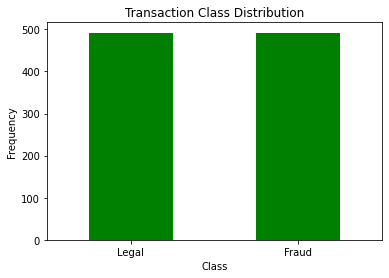

In [ ]:
count_classes = pd.value_counts(new_data['Class'], sort = True)

count_classes.plot(kind = 'bar',color='g', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,91903.166667,-0.075677,-0.003925,0.081991,0.051176,0.035951,-0.030759,-0.023161,-0.001544,0.022555,-0.023789,-0.054727,0.002954,-0.073644,0.093109,-0.035658,0.018469,-0.027934,0.013568,-0.003589,-0.013575,-0.021902,0.000346,-0.015850,0.03620,0.028652,0.001500,0.018885,-0.023144,86.289350
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting data into features and targets.

In [ ]:
X=new_data.drop(columns='Class',axis=1)
Y=new_data['Class']

In [ ]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
174999  122161.0 -0.330795  0.994296  ...  0.220594  0.213902    0.00
87086    61531.0 -1.298090 -0.262751  ...  0.363783  0.165060   28.90
184763  126378.0  0.112625  1.046821  ...  0.522484  0.323400    0.74
146259   87570.0 -0.353436  1.269883  ...  0.327169  0.212094   14.96
40399    40221.0 -0.771810 -3.558222  ... -0.186201  0.163420  964.10
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]


In [ ]:
print(Y)

174999    0
87086     0
184763    0
146259    0
40399     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training set and testing set data. 

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


Model training--->>>
LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression(max_iter=100)

Training the Logistic Regression model with the traing data .

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

Now we will find the performance of the model by checking the accuracy score.

ACCURACY SCORE OF TRAINING DATA 

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('ACCURACY ON TRAINING DATA:',training_data_accuracy)

ACCURACY ON TRAINING DATA: 0.9440914866581956


ACCURACY SCORE OF TEST DATA

In [ ]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('ACCURACY ON TESTING DATA:',test_data_accuracy)

ACCURACY ON TESTING DATA: 0.9238578680203046
